In [144]:
import dadi
import ipywidgets as widgets
from ipywidgets import FloatSlider

from IPython.display import display
from Models import get_dadi_model_func, get_dadi_model_params

Upload data

In [145]:
upload = widgets.FileUpload(
               accept='',  # Accepted file extension e.g. '.fs'
               multiple=False  # True to accept multiple files upload else False
           )
display(upload)

FileUpload(value={}, description='Upload')

In [146]:
# Load the data from user input
uploaded_filename = next(iter(upload.value))
content = upload.value[uploaded_filename]['content']
with open(uploaded_filename, 'wb') as f: f.write(content)
# Read data into dadi
data = dadi.Spectrum.from_file(uploaded_filename)
ns = data.sample_sizes

Select grid size

In [147]:
a = widgets.BoundedIntText(
    value=40,
    min=1,
    max=10000,
    step=1,
    description='Grid-x:',
    disabled=False
)
b = widgets.BoundedIntText(
    value=50,
    min=1,
    max=10000,
    step=1,
    description='Grid-y:',
    disabled=False
)
c = widgets.BoundedIntText(
    value=60,
    min=1,
    max=10000,
    step=1,
    description='Grid-z:',
    disabled=False
)

ui = widgets.HBox([a, b, c])

def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [148]:
# These are the grid point settings will use for extrapolation.
pts_l = [a.value, b.value, c.value]

Select demographic models

In [149]:
model = widgets.Dropdown(
    options=['bottlegrowth_1d', 'growth_1d', 'snm_1d', 'three_epoch_1d', 'two_epoch_1d',
             'bottlegrowth_2d', 'bottlegrowth_split', 'bottlegrowth_split_mig', 'IM', 'IM_pre', 'snm_2d', 'split_mig', 'split_asym_mig'],
    description='Model:',
)
display(model)

Dropdown(description='Model:', options=('bottlegrowth_1d', 'growth_1d', 'snm_1d', 'three_epoch_1d', 'two_epoch…

In [172]:
func = get_dadi_model_func(model.value)

In [173]:
# Make the extrapolating version of our demographic model function.
func_ex = dadi.Numerics.make_extrap_log_func(func)

Select upper bounds

In [174]:
params = get_dadi_model_params(model.value)
sliders = []
for p in params:
    if p == 's':
        s = widgets.BoundedFloatText(
            value=0.5,
            min=0,
            max=1,
            step=0.1,
            description=p+':',
        )
    else:
        s = widgets.BoundedFloatText(
                value=10,
                min=0,
                max=10000,
                step=0.1,
                description=p+':',
        )
    sliders.append(s)
print(sliders)    
ui = widgets.VBox(sliders)
display(ui)

[BoundedFloatText(value=10.0, description='nuB:', max=10000.0, step=0.1), BoundedFloatText(value=10.0, description='nuF:', max=10000.0, step=0.1), BoundedFloatText(value=10.0, description='T:', max=10000.0, step=0.1), BoundedFloatText(value=10.0, description='Ts:', max=10000.0, step=0.1)]


In [175]:
upper_bound = []
for s in sliders:
    upper_bound.append(s.value)

Select lower bounds

In [176]:
params = get_dadi_model_params(model.value)
sliders = []
for p in params:
    if p == 's':
        s = widgets.BoundedFloatText(
            value=0.5,
            min=0,
            max=1,
            step=0.1,
            description=p+':',
        )
    else:
        s = widgets.BoundedFloatText(
                value=0,
                min=0,
                max=10000,
                step=0.1,
                description=p+':',
        )
    sliders.append(s)
    
ui = widgets.VBox(sliders)
display(ui)

In [177]:
lower_bound = []
for s in sliders:
    lower_bound.append(s.value)

Ineractive plots to choose initial p0

In [178]:
def plot_func_2d(vals):
    p0 = [x for x in vals]
    test_model = func_ex(p0, ns, pts_l)
    dadi.Plotting.plot_2d_comp_multinom(test_model, data, vmin=1, resid_range=3, show=True)
    
def plot_func_1d(vals):
    p0 = [x for x in vals]
    test_model = func_ex(p0, ns, pts_l)
    dadi.Plotting.plot_1d_comp_multinom(test_model, data, vmin=1, resid_range=3, show=True)
    
      
sliders = []
for p, l, u in zip(params, lower_bound, upper_bound):
    s = FloatSlider(
        value=0.5,
        min=l,
        max=u,
        step=0.1,
        description=p+':',
    )
    sliders.append(s)
ui = widgets.VBox(sliders)
display(ui)       

# @widgets.interact_manual(
#     s=(lower_bound[0],upper_bound[0]), nu1=(lower_bound[1],upper_bound[1]), nu2=(lower_bound[2],upper_bound[2]), 
 #   T=(lower_bound[3],upper_bound[3]), m12=(lower_bound[4],upper_bound[4]), m21=(lower_bound[5],upper_bound[5])
#     )
    
# def plot_func(s, nu1, nu2, T, m12, m21):
#     p0 = [s, nu1, nu2, T, m12, m21]
#     test_model = func_ex(p0, ns, pts_l)
#     dadi.Plotting.plot_2d_comp_multinom(test_model, data, vmin=1, resid_range=3, show=True)
    


[2.6, 1.9, 0.5, 0.5]
bottlegrowth_split


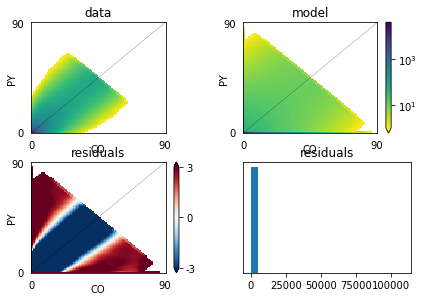

In [186]:
p0 = []
for s in sliders:
    p0.append(s.value)

print(p0)
print(model.value)
if '1d' not in model.value:
    plot_func_2d(p0)
else:
    plot_func_1d(p0)
    